In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [4]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [5]:
import pandas as pd
from PIL import Image as ima
import warnings
from pathlib import Path
import random

### Data preparation

In [6]:
koord  = pd.read_csv('/home/yelhe/script/mt/output/koord.csv')

In [7]:
# koord.head()
name1 = koord.Nr.astype(str) + '1.jpg'
name2 = koord.Nr.astype(str) + '2.jpg'
name3 = koord.Nr.astype(str) + '3.jpg'
name4 = koord.Nr.astype(str) + '4.jpg'

In [8]:
gsv_image1 = []
gsv_image2 = []
gsv_image3 = []
gsv_image4 = []

nf1 = []
nf2 = []
nf3 = []
nf4 = []
for i in range(0,349):
    path1 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name1[i])
    c1 = path1.is_file()
    path2 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name2[i])
    c2 = path2.is_file()
    path3 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name3[i])
    c3 = path3.is_file()
    path4 = Path('/home/yelhe/data/gsv/GSV_filtered/' + name4[i])
    c4 = path4.is_file()
    if c1 is True:
        im1 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name1[i])
        im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
        gsv_image1.append(im1)
        nf1.append(name1[i])
    if c2 is True:
        im2 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name2[i])
        im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
        gsv_image2.append(im2)
        nf2.append(name2[i])
    if c3 is True:
        im3 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name3[i])
        im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)
        gsv_image3.append(im3)
        nf3.append(name3[i])
    if c4 is True:
        im4 = cv2.imread("/home/yelhe/data/gsv/GSV_filtered/" + name4[i])
        im4 = cv2.cvtColor(im4, cv2.COLOR_BGR2RGB)
        gsv_image4.append(im4)
        nf4.append(name4[i])

In [9]:
print(len(gsv_image1),len(gsv_image2),len(gsv_image3),len(gsv_image4))

295 295 295 295


In [10]:
n1 = [s.replace('.jpg', '') for s in nf1]
n2 = [s.replace('.jpg', '') for s in nf2]
n3 = [s.replace('.jpg', '') for s in nf3]
n4 = [s.replace('.jpg', '') for s in nf4]

### Functions preparation

In [11]:
from mt_function_yl import *

### Run workflow on generated gsv mask files

In [12]:
mask1 = []
mask2 = []
mask3 = []
mask4 = []
# Load all generated mask files

for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output/' + n1[i] + '.npy', allow_pickle=True)
    mask1.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output/' + n2[i] + '.npy', allow_pickle=True)
    mask2.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output/' + n3[i] + '.npy', allow_pickle=True)
    mask3.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output/' + n4[i] + '.npy', allow_pickle=True)
    mask4.append(m4)


print(len(mask1), len(mask2), len(mask3), len(mask4))

295 295 295 295


In [13]:
m1f = []
m2f = []
m3f = []
m4f = []

# Load all generated filtered mask files
for i in range(0,295):
    m1 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n1[i] + 'f.npy', allow_pickle=True)
    m1f.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n2[i] + 'f.npy', allow_pickle=True)
    m2f.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n3[i] + 'f.npy', allow_pickle=True)
    m3f.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + n4[i] + 'f.npy', allow_pickle=True)
    m4f.append(m4)

print(len(m1f), len(m2f), len(m3f), len(m4f))

295 295 295 295


In [49]:
ra = list(range(10, 295))
# Random choose accidents
il = random.sample(ra, 10)
print(il)

[270, 280, 138, 63, 22, 37, 127, 173, 148, 257]


In [50]:
# il = [283, 193, 38, 224, 27, 66, 174, 77, 160, 182]
# il = []

In [51]:
print(il)

[270, 280, 138, 63, 22, 37, 127, 173, 148, 257]


In [52]:
nlist = pd.DataFrame()

In [53]:
nlist['n1'] = n1

In [54]:
nlist['n'] = nlist.n1.str[-15:-1]

In [55]:
nlist = nlist.drop(['n1'], axis=1)

In [56]:
nlist_s = nlist.iloc[il]

In [57]:
nlist_s

,n
270,99900060389391
280,99900046980125
138,99900062265796
63,99900057250698
22,99900063154701
37,99900053278072
127,99900056860812
173,99900057801168
148,99900060643121
257,99900058501056


In [58]:
r1 = nlist_s.n.astype(str) + '1'
r2 = nlist_s.n.astype(str) + '2'
r3 = nlist_s.n.astype(str) + '3'
r4 = nlist_s.n.astype(str) + '4'

In [59]:
r1 = [str(element) for element in r1]
r2 = [str(element) for element in r2]
r3 = [str(element) for element in r3]
r4 = [str(element) for element in r4]

In [60]:
r1

['999000603893911',
 '999000469801251',
 '999000622657961',
 '999000572506981',
 '999000631547011',
 '999000532780721',
 '999000568608121',
 '999000578011681',
 '999000606431211',
 '999000585010561']

In [62]:
# mr1 = []
# mr2 = []
# mr3 = []
# mr4 = []
# for i in range(0,10):
#     m1 = np.load('/home/yelhe/script/mt/random/' + r1[i] + '.npy', allow_pickle=True)
#     mr1.append(m1)
#     m2 = np.load('/home/yelhe/script/mt/random/' + r2[i] + '.npy', allow_pickle=True)
#     mr2.append(m2)
#     m3 = np.load('/home/yelhe/script/mt/random/' + r3[i] + '.npy', allow_pickle=True)
#     mr3.append(m3)
#     m4 = np.load('/home/yelhe/script/mt/random/' + r4[i] + '.npy', allow_pickle=True)
#     mr4.append(m4)

# print(len(mr1), len(mr2), len(mr3), len(mr4))

In [63]:
mr1f = []
mr2f = []
mr3f = []
mr4f = []
for i in range(0,10):
    m1 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + r1[i] + 'f.npy', allow_pickle=True)
    mr1f.append(m1)
    m2 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + r2[i] + 'f.npy', allow_pickle=True)
    mr2f.append(m2)
    m3 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + r3[i] + 'f.npy', allow_pickle=True)
    mr3f.append(m3)
    m4 = np.load('/home/yelhe/data/gsv_output_filtered_new/' + r4[i] + 'f.npy', allow_pickle=True)
    mr4f.append(m4)

print(len(mr1f), len(mr2f), len(mr3f), len(mr4f))

10 10 10 10


In [65]:
for i in range(0,10):
    print(i, '1', len(mr1f[i]))
    print(i, '2', len(mr2f[i]))
    print(i, '3', len(mr3f[i]))
    print(i, '4', len(mr4f[i]))

0 1 40
0 2 51
0 3 58
0 4 47
1 1 33
1 2 44
1 3 40
1 4 44
2 1 61
2 2 56
2 3 48
2 4 42
3 1 35
3 2 35
3 3 35
3 4 40
4 1 53
4 2 47
4 3 42
4 4 57
5 1 62
5 2 62
5 3 56
5 4 48
6 1 23
6 2 21
6 3 37
6 4 27
7 1 45
7 2 35
7 3 37
7 4 38
8 1 51
8 2 40
8 3 32
8 4 31
9 1 37
9 2 52
9 3 45
9 4 28


In [66]:
df1r = []
df2r = []
df3r = []
df4r = []
for i in range(0, 10):
    a = il[i]
    print(i, a)
    df1r.append(feature_summary(gsv_image1[a], m1f[a]))
    df2r.append(feature_summary(gsv_image2[a], m2f[a]))
    df3r.append(feature_summary(gsv_image3[a], m3f[a]))
    df4r.append(feature_summary(gsv_image4[a], m4f[a]))


0 270
1 280
2 138
3 63
4 22
5 37
6 127
7 173
8 148
9 257


In [1440]:
j = j+1
q = il[j]
print(j, q, r3[j])
mb = m3f[q]
img = gsv_image3[q]
df3r[j].info()

6 127 999000568608123
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               37 non-null     int64  
 1   gmedian            37 non-null     float64
 2   rmedian            37 non-null     float64
 3   bmedian            37 non-null     float64
 4   gmean              37 non-null     float64
 5   rmean              37 non-null     float64
 6   bmean              37 non-null     float64
 7   gstd               37 non-null     float64
 8   rstd               37 non-null     float64
 9   bstd               37 non-null     float64
 10  gq25               37 non-null     float64
 11  gq75               37 non-null     float64
 12  rq25               37 non-null     float64
 13  rq75               37 non-null     float64
 14  bq25               37 non-null     float64
 15  bq75               37 non-null     float64
 16  cdmean

36 36 label


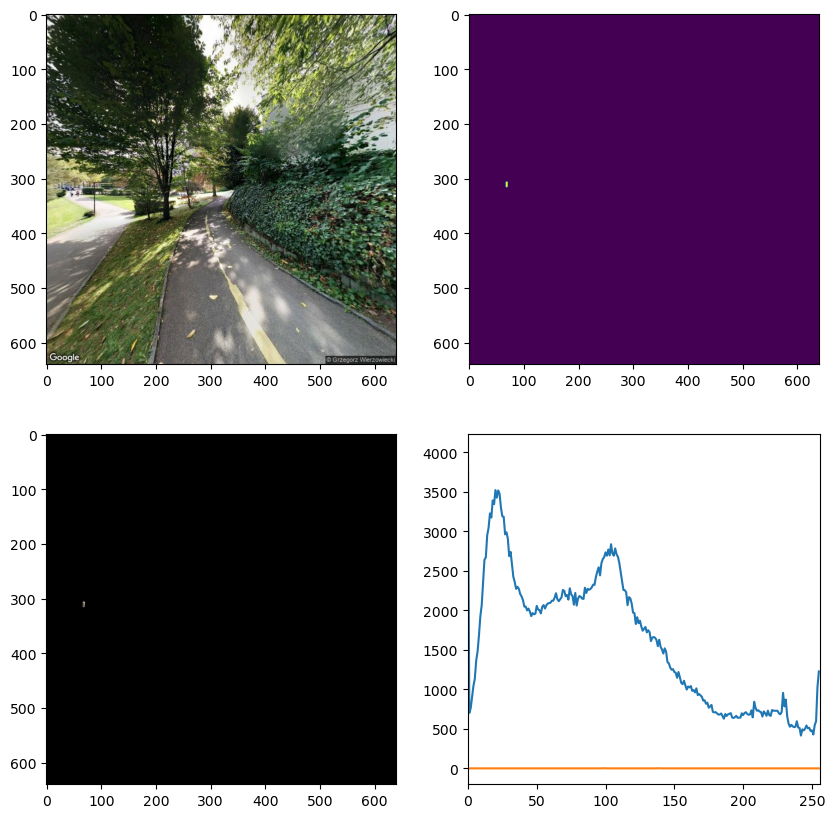

In [1488]:
# t = 0
t = t+1
p = ((df3r[j]).iloc[t]['mask']) -1
i = int(p)
print(i, t, 'label')
maskedimg = cv2.bitwise_and(img,img,mask = mb[i])
# create a mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mb[i],[256],[0,256])
plt.figure(figsize = (10,10))
plt.subplot(221), plt.imshow(img)
plt.subplot(222), plt.imshow(mb[i])
plt.subplot(223), plt.imshow(maskedimg)
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [33]:
for i in range(0, 10):
    a = il[i]
    df1r[i] = df1r[i].assign(Nr = n1[a])
    df2r[i] = df2r[i].assign(Nr = n2[a])
    df3r[i] = df3r[i].assign(Nr = n3[a])
    df4r[i] = df4r[i].assign(Nr = n4[a])
    print(i, a)

0 283
1 193
2 38
3 224
4 27
5 66
6 174
7 77
8 160
9 182


In [3362]:
df4r[5].head()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,extent_s,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nr
0,1,142.0,122.0,134.0,134.936263,122.681989,135.922932,64.957615,64.238258,66.110616,...,0.87738,0.981105,1.597015,0.882711,359.048939,1.30217,1382.859952,1.0,1.0,999000566471554
1,2,219.0,243.0,198.0,219.456062,240.454539,197.900175,13.62533,11.662772,18.487211,...,0.845113,0.937841,0.810298,0.850237,345.600085,1.284929,1849.3839,0.5,1.0,999000566471554
2,3,142.0,122.0,134.0,134.889454,122.60563,135.865118,64.923831,64.193667,66.084536,...,0.878524,0.980304,1.597015,0.883862,359.282908,1.256715,1406.232536,1.0,1.0,999000566471554
3,4,82.0,75.0,87.5,82.833956,77.502313,88.316839,28.054171,27.50982,30.450527,...,0.614372,0.947368,1.546667,0.627931,83.400885,2.177621,340.994949,1.0,1.0,999000566471554
4,5,76.0,96.0,120.0,83.205075,102.768786,119.81859,39.705632,42.242759,50.084717,...,0.744372,0.972664,1.833333,0.761896,88.017192,1.998311,333.722869,1.0,1.0,999000566471554


In [34]:
df1r[0] = df1r[0].assign(label = [])
df1r[1] = df1r[1].assign(label = [])
df1r[2] = df1r[2].assign(label = [])
df1r[3] = df1r[3].assign(label = [])
df1r[4] = df1r[4].assign(label = [])
df1r[5] = df1r[5].assign(label = [])
df1r[6] = df1r[6].assign(label = [])
df1r[7] = df1r[7].assign(label = [])
df1r[8] = df1r[8].assign(label = [])
df1r[9] = df1r[9].assign(label = [])

df2r[0] = df2r[0].assign(label = [])
df2r[1] = df2r[1].assign(label = [])
df2r[2] = df2r[2].assign(label = [])
df2r[3] = df2r[3].assign(label = [])
df2r[4] = df2r[4].assign(label = [])
df2r[5] = df2r[5].assign(label = [])
df2r[6] = df2r[6].assign(label = [])
df2r[7] = df2r[7].assign(label = [])
df2r[8] = df2r[8].assign(label = [])
df2r[9] = df2r[9].assign(label = [])

df3r[0] = df3r[0].assign(label = [])
df3r[1] = df3r[1].assign(label = [])
df3r[2] = df3r[2].assign(label = [])
df3r[3] = df3r[3].assign(label = [])
df3r[4] = df3r[4].assign(label = [])
df3r[5] = df3r[5].assign(label = [])
df3r[6] = df3r[6].assign(label = [])
df3r[7] = df3r[7].assign(label = [])
df3r[8] = df3r[8].assign(label = [])
df3r[9] = df3r[9].assign(label = [])


df4r[0] = df4r[0].assign(label = [])
df4r[1] = df4r[1].assign(label = [])
df4r[2] = df4r[2].assign(label = [])
df4r[3] = df4r[3].assign(label = [])
df4r[4] = df4r[4].assign(label = [])
df4r[5] = df4r[5].assign(label = [])
df4r[6] = df4r[6].assign(label = [])
df4r[7] = df4r[7].assign(label = [])
df4r[8] = df4r[8].assign(label = [])
df4r[9] = df4r[9].assign(label = [])


In [35]:
dfr_curb = pd.DataFrame()

In [36]:
for i in range(0,10):
    dfi = df1r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = df2r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = df3r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])
for i in range(0,10):
    dfi = df4r[i]
    dfic = dfi.loc[dfi['label'] == 'curb']
    dfr_curb = pd.concat([dfr_curb, dfic])

In [37]:
dfr_curb

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,solidity,aspect_ratio_wh,extent,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,Nr,label
37,38,89.0,86.0,82.0,83.964153,82.889988,77.677379,20.441661,18.218398,20.212676,...,0.927985,4.971015,0.806904,30.580949,8.811351,158.183766,1.0,1.0,999000524207101,curb
5,6,160.0,157.0,161.0,150.332414,145.645854,151.448763,25.694289,26.320306,25.199773,...,0.866298,0.107932,0.502584,121.485621,18.171965,976.202227,1.0,1.0,999000510761211,curb
22,23,160.0,158.0,161.0,150.359386,146.838113,151.362376,24.111482,24.834688,23.477196,...,0.935631,0.234770,0.702250,95.519812,19.027941,477.754397,1.0,1.0,999000510761211,curb
26,27,161.0,155.0,161.0,151.567616,144.943917,152.858661,27.512981,28.026866,27.180830,...,0.907856,0.115385,0.551021,73.231721,18.207771,558.004180,1.0,1.0,999000510761211,curb
54,55,101.0,89.0,107.0,112.907021,98.487666,119.261860,31.273430,28.413111,31.691105,...,0.912023,0.170352,0.824744,24.371423,9.489508,134.325901,1.0,1.0,999000465410312,curb
65,66,179.0,167.0,185.0,179.172646,166.665919,184.894619,24.642361,24.760794,24.972184,...,0.715054,24.845264,0.635632,20.575523,33.558720,246.124890,1.0,1.0,999000509348992,curb
24,25,161.0,140.0,173.0,156.049383,135.787037,168.399691,18.772863,18.196485,19.064603,...,0.808835,18.950000,0.700528,26.001735,27.071133,262.651802,1.0,1.0,999000464845312,curb
36,37,186.0,176.0,202.0,170.391897,160.750517,186.173966,40.104738,41.095276,40.323475,...,0.825971,21.135672,0.735131,82.945463,23.377138,817.923880,1.0,1.0,999000481605162,curb
56,57,180.0,168.0,187.0,172.212061,160.589523,180.652087,31.031677,30.973516,30.788170,...,0.899645,0.186275,0.719298,42.129514,43.362460,233.798990,1.0,1.0,999000481605162,curb
13,14,94.0,85.0,96.0,97.502207,89.466893,99.023406,26.969688,26.428106,27.017320,...,0.933473,9.736435,0.576334,109.039034,24.071081,884.783833,1.0,1.0,999000510761212,curb


In [38]:
dfr_all = pd.DataFrame()

In [39]:
for i in range(0, 10):
    dfi1 = df1r[i]
    dfi2 = df2r[i]
    dfi3 = df3r[i]
    dfi4 = df4r[i]
    dfr_all = pd.concat([dfr_all, dfi1, dfi2, dfi3, dfi4])
    print(i)

0
1
2
3
4
5
6
7
8
9


In [40]:
for i in range(0, 10):
    print(len(df1r[i]), len(df2r[i]),len(df3r[i]),len(df4r[i]))

53 56 48 37
83 52 78 105
54 74 78 39
58 37 38 51
45 42 39 53
31 49 42 53
54 78 59 38
60 40 43 58
50 31 45 37
54 60 35 39


In [41]:
dfr_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2076 entries, 0 to 39
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               2076 non-null   int64  
 1   gmedian            2076 non-null   float64
 2   rmedian            2076 non-null   float64
 3   bmedian            2076 non-null   float64
 4   gmean              2076 non-null   float64
 5   rmean              2076 non-null   float64
 6   bmean              2076 non-null   float64
 7   gstd               2076 non-null   float64
 8   rstd               2076 non-null   float64
 9   bstd               2076 non-null   float64
 10  isconvex           2076 non-null   int64  
 11  area               2076 non-null   float64
 12  aspect_ratio_wh_s  2076 non-null   float64
 13  extent_s           2076 non-null   float64
 14  solidity           2076 non-null   float64
 15  aspect_ratio_wh    2076 non-null   float64
 16  extent             2076 non-nul

In [42]:
dfr_curb.to_csv('/home/yelhe/script/mt/curb_r_u.csv', index = False)
dfr_all.to_csv('/home/yelhe/script/mt/df_all_r_u.csv', index = False)

In [38]:
# i = i+1
# print(i)
# plt.figure(figsize = (10,10))
# plt.subplot(421), plt.imshow(gsv_image1[i])
# plt.subplot(422), plt.imshow(m1c[i][0])
# plt.subplot(423), plt.imshow(gsv_image2[i])
# plt.subplot(424), plt.imshow(m2c[i][0])
# plt.subplot(425), plt.imshow(gsv_image3[i])
# plt.subplot(426), plt.imshow(m3c[i][0])
# plt.subplot(427), plt.imshow(gsv_image4[i])
# plt.subplot(428), plt.imshow(m4c[i][0])
# plt.show()

In [39]:
# for i in range(0,10):
#     m = il[i]
#     m1 = np.load('/home/yelhe/script/mt/random/' + n1[m] + '.npy', allow_pickle=True)
#     m1f = filter_overlap(m1)
#     np.save('/home/yelhe/script/mt/random/' + n1[m] + 'f.npy', m1f, allow_pickle=True)
#     m2 = np.load('/home/yelhe/script/mt/random/' + n2[m] + '.npy', allow_pickle=True)
#     m2f = filter_overlap(m2)
#     np.save('/home/yelhe/script/mt/random/' + n2[m] + 'f.npy', m2f, allow_pickle=True)
#     m3 = np.load('/home/yelhe/script/mt/random/' + n3[m] + '.npy', allow_pickle=True)
#     m3f = filter_overlap(m3)
#     np.save('/home/yelhe/script/mt/random/' + n3[m] + 'f.npy', m3f, allow_pickle=True)
#     m4 = np.load('/home/yelhe/script/mt/random/' + n4[m] + '.npy', allow_pickle=True)
#     m4f = filter_overlap(m4)
#     np.save('/home/yelhe/script/mt/random/' + n4[m] + 'f.npy', m4f, allow_pickle=True)
#     print(i)

(array([4., 1., 0., 1., 0., 1., 0., 5., 3., 3.]),
 array([ 86. ,  96.4, 106.8, 117.2, 127.6, 138. , 148.4, 158.8, 169.2,
        179.6, 190. ]),
 <BarContainer object of 10 artists>)

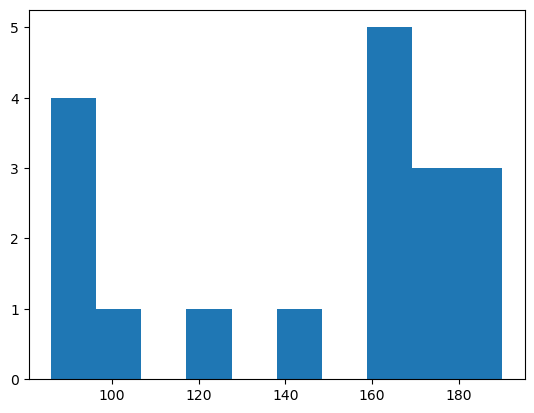

In [3381]:
plt.hist(dfr_curb['gmedian'])

(array([5., 0., 0., 1., 1., 1., 0., 3., 5., 2.]),
 array([ 85. ,  94.4, 103.8, 113.2, 122.6, 132. , 141.4, 150.8, 160.2,
        169.6, 179. ]),
 <BarContainer object of 10 artists>)

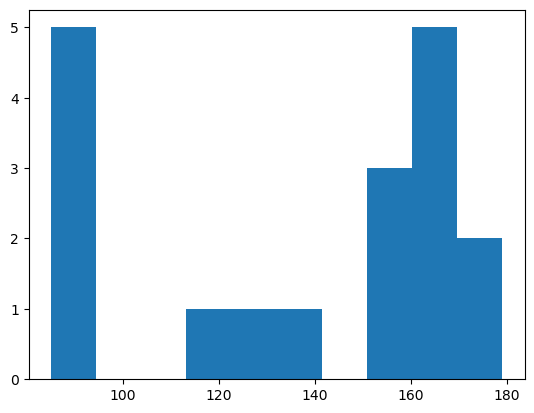

In [3382]:
plt.hist(dfr_curb['rmedian'])

(array([2., 2., 1., 1., 0., 1., 3., 4., 2., 2.]),
 array([ 82.,  94., 106., 118., 130., 142., 154., 166., 178., 190., 202.]),
 <BarContainer object of 10 artists>)

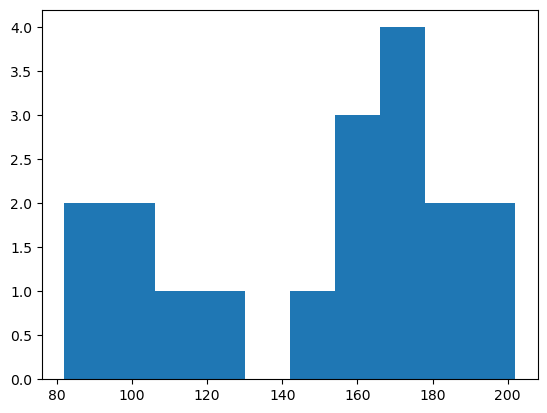

In [3383]:
plt.hist(dfr_curb['bmedian'])

(array([2., 1., 1., 1., 1., 0., 3., 3., 0., 6.]),
 array([ 83.96415328,  93.48500252, 103.00585177, 112.52670101,
        122.04755026, 131.56839951, 141.08924875, 150.610098  ,
        160.13094725, 169.65179649, 179.17264574]),
 <BarContainer object of 10 artists>)

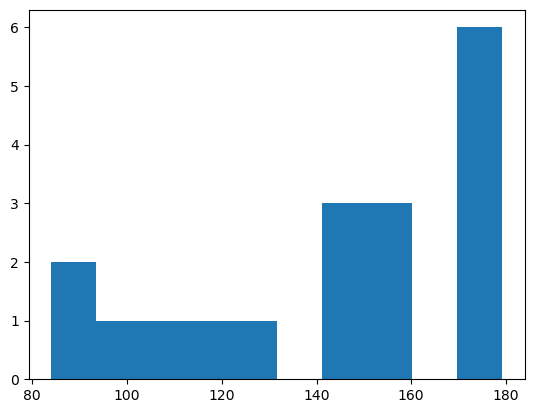

In [3384]:
plt.hist(dfr_curb['gmean'])

(array([2., 2., 1., 0., 2., 0., 1., 3., 1., 6.]),
 array([ 82.88998764,  91.38118689,  99.87238615, 108.36358541,
        116.85478466, 125.34598392, 133.83718317, 142.32838243,
        150.81958169, 159.31078094, 167.8019802 ]),
 <BarContainer object of 10 artists>)

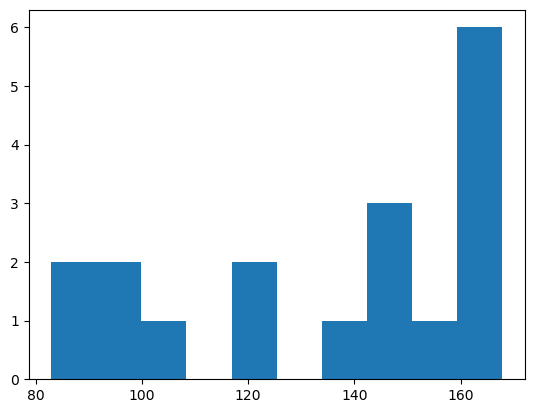

In [3385]:
plt.hist(dfr_curb['rmean'])

(array([2., 1., 1., 1., 1., 0., 4., 1., 3., 4.]),
 array([ 77.67737948,  88.52703808,  99.37669669, 110.22635529,
        121.0760139 , 131.9256725 , 142.7753311 , 153.62498971,
        164.47464831, 175.32430691, 186.17396552]),
 <BarContainer object of 10 artists>)

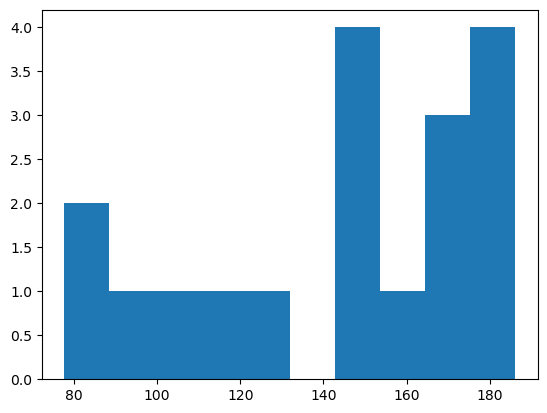

In [3386]:
plt.hist(dfr_curb['bmean'])

(array([1., 3., 1., 4., 2., 0., 2., 1., 1., 3.]),
 array([15.98236954, 18.45917662, 20.93598371, 23.4127908 , 25.88959788,
        28.36640497, 30.84321206, 33.32001914, 35.79682623, 38.27363332,
        40.7504404 ]),
 <BarContainer object of 10 artists>)

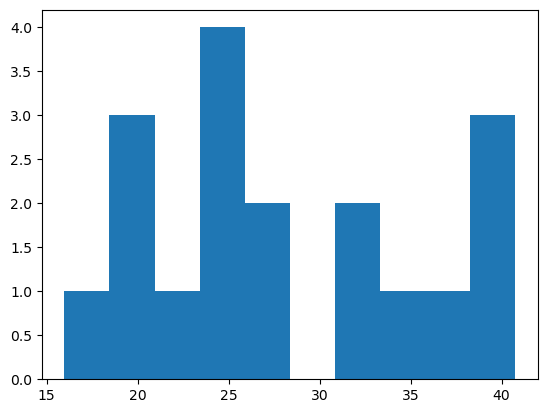

In [3387]:
plt.hist(dfr_curb['gstd'])

(array([3., 1., 1., 5., 2., 1., 0., 1., 3., 1.]),
 array([16.68038964, 19.12187829, 21.56336695, 24.0048556 , 26.44634425,
        28.88783291, 31.32932156, 33.77081021, 36.21229887, 38.65378752,
        41.09527617]),
 <BarContainer object of 10 artists>)

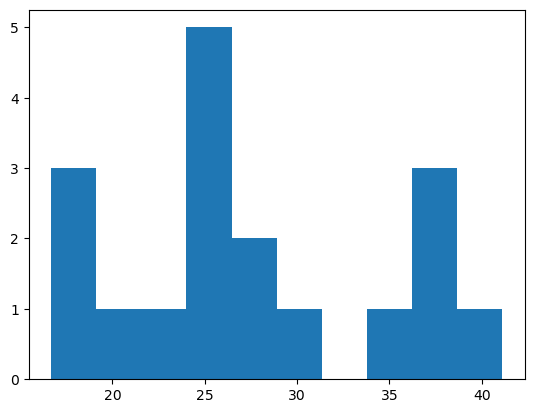

In [3388]:
plt.hist(dfr_curb['rstd'])

(array([1., 3., 1., 3., 3., 0., 2., 1., 2., 2.]),
 array([15.04748303, 17.64353486, 20.2395867 , 22.83563853, 25.43169036,
        28.02774219, 30.62379402, 33.21984585, 35.81589768, 38.41194951,
        41.00800134]),
 <BarContainer object of 10 artists>)

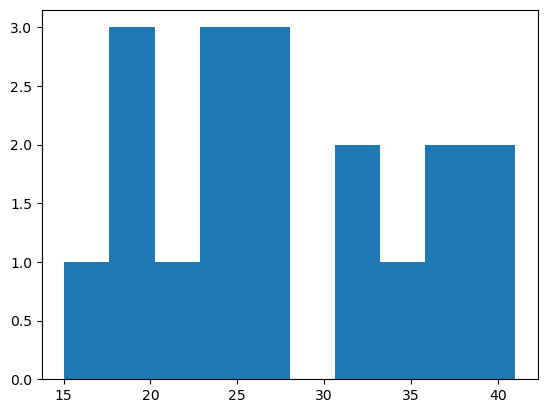

In [3389]:
plt.hist(dfr_curb['bstd'])

(array([ 0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

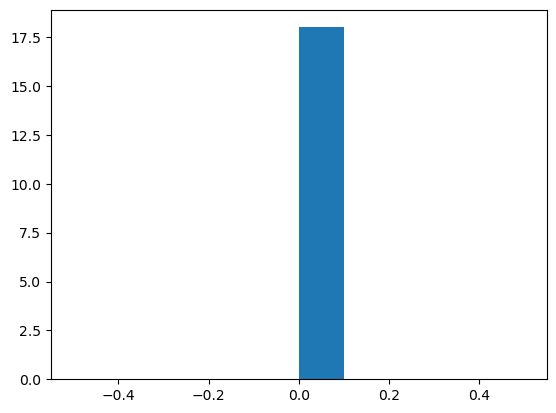

In [3390]:
plt.hist(dfr_curb['isconvex'])

(array([ 0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

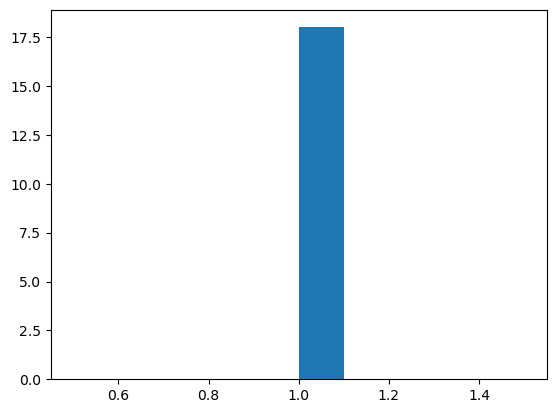

In [3391]:
plt.hist(dfr_curb['is_cen_inside'])

(array([ 0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,  0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

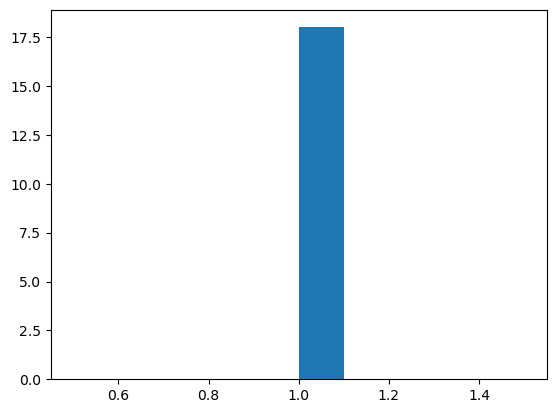

In [3392]:
plt.hist(dfr_curb['is_mce_inside'])

(array([8., 2., 1., 2., 1., 0., 2., 0., 1., 1.]),
 array([  257.  ,  1390.45,  2523.9 ,  3657.35,  4790.8 ,  5924.25,
         7057.7 ,  8191.15,  9324.6 , 10458.05, 11591.5 ]),
 <BarContainer object of 10 artists>)

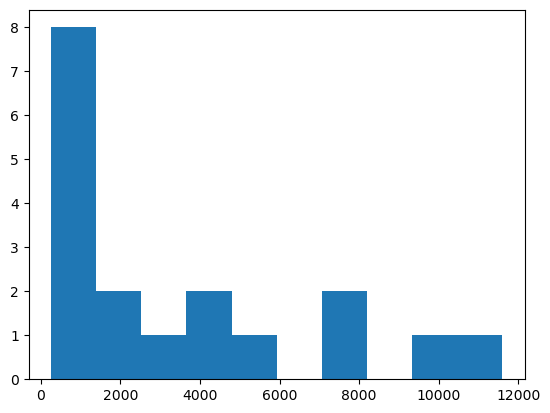

In [3393]:
plt.hist(dfr_curb['area'])

(array([12.,  4.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 0.80936455,  3.54092809,  6.27249164,  9.00405518, 11.73561873,
        14.46718227, 17.19874582, 19.93030936, 22.66187291, 25.39343645,
        28.125     ]),
 <BarContainer object of 10 artists>)

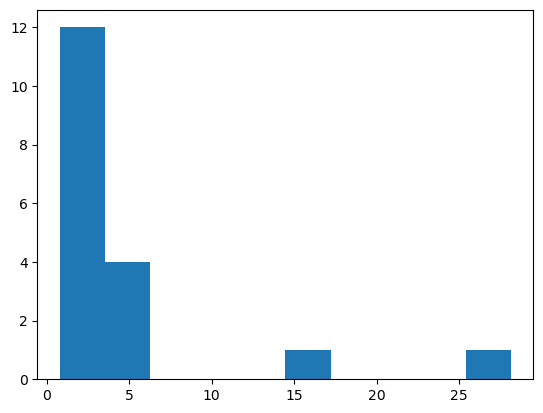

In [3394]:
plt.hist(dfr_curb['aspect_ratio_wh_s'])

(array([7., 3., 3., 0., 1., 1., 1., 1., 0., 1.]),
 array([2.72748162e-02, 4.12208220e+00, 8.21688959e+00, 1.23116970e+01,
        1.64065044e+01, 2.05013117e+01, 2.45961191e+01, 2.86909265e+01,
        3.27857339e+01, 3.68805413e+01, 4.09753487e+01]),
 <BarContainer object of 10 artists>)

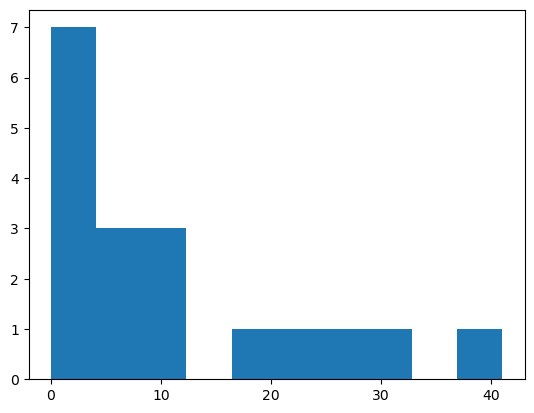

In [3395]:
plt.hist(dfr_curb['aspect_ratio_wh'])

(array([9., 2., 0., 1., 2., 0., 1., 2., 0., 1.]),
 array([0.06783063, 0.12871747, 0.18960431, 0.25049115, 0.31137799,
        0.37226483, 0.43315167, 0.49403851, 0.55492535, 0.61581219,
        0.67669903]),
 <BarContainer object of 10 artists>)

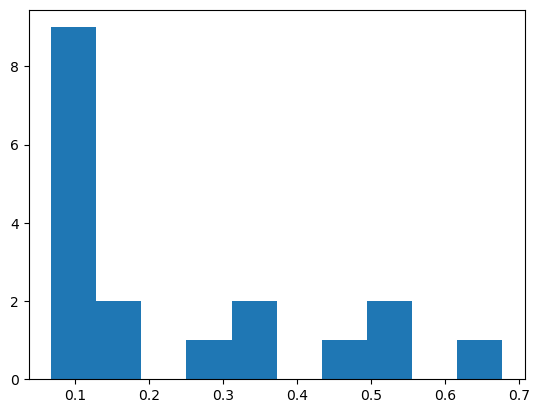

In [3396]:
plt.hist(dfr_curb['extent_s'])

(array([4., 2., 2., 2., 1., 0., 3., 1., 1., 2.]),
 array([0.50258419, 0.53480015, 0.56701611, 0.59923208, 0.63144804,
        0.66366401, 0.69587997, 0.72809594, 0.7603119 , 0.79252787,
        0.82474383]),
 <BarContainer object of 10 artists>)

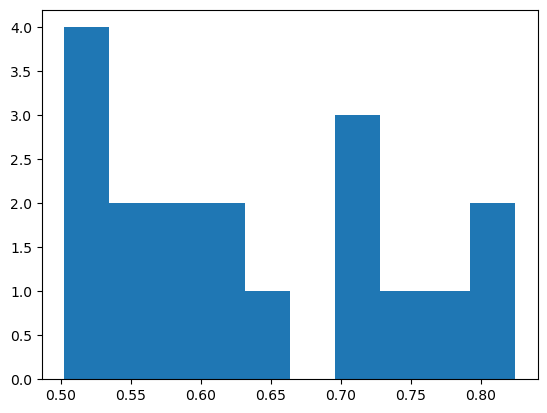

In [3397]:
plt.hist(dfr_curb['extent'])

(array([1., 2., 1., 1., 2., 1., 2., 1., 4., 3.]),
 array([0.67456073, 0.70289093, 0.73122113, 0.75955133, 0.78788153,
        0.81621173, 0.84454193, 0.87287213, 0.90120233, 0.92953253,
        0.95786273]),
 <BarContainer object of 10 artists>)

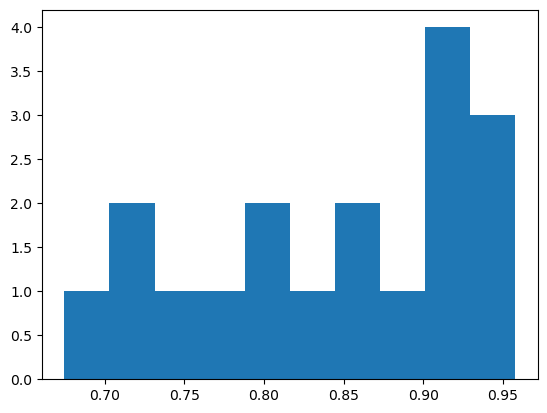

In [3398]:
plt.hist(dfr_curb['solidity'])

(array([5., 2., 2., 1., 1., 2., 1., 2., 1., 1.]),
 array([ 18.08929415,  28.42892687,  38.76855958,  49.1081923 ,
         59.44782501,  69.78745773,  80.12709044,  90.46672316,
        100.80635587, 111.14598859, 121.4856213 ]),
 <BarContainer object of 10 artists>)

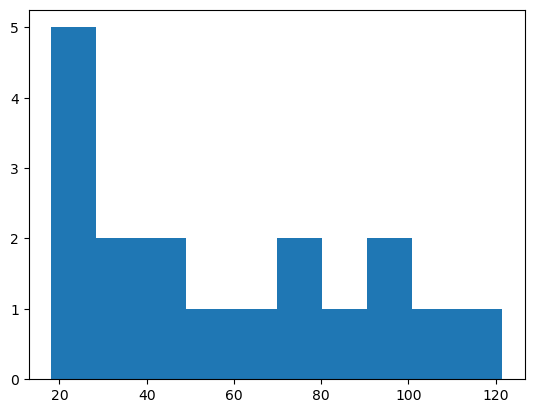

In [3399]:
plt.hist(dfr_curb['ed'])

(array([9., 5., 1., 1., 0., 0., 0., 1., 0., 1.]),
 array([  8.37894241,  23.27550148,  38.17206056,  53.06861964,
         67.96517871,  82.86173779,  97.75829687, 112.65485594,
        127.55141502, 142.4479741 , 157.34453318]),
 <BarContainer object of 10 artists>)

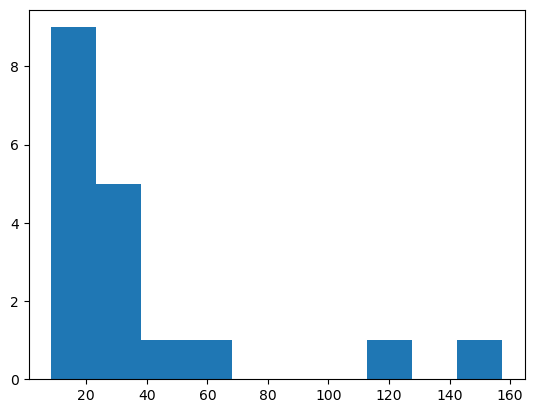

In [3400]:
plt.hist(dfr_curb['ratio_ell'])

(array([3., 4., 2., 2., 1., 0., 2., 1., 2., 1.]),
 array([ 115.6812396 ,  218.26012807,  320.83901653,  423.417905  ,
         525.99679346,  628.57568192,  731.15457039,  833.73345885,
         936.31234732, 1038.89123578, 1141.47012424]),
 <BarContainer object of 10 artists>)

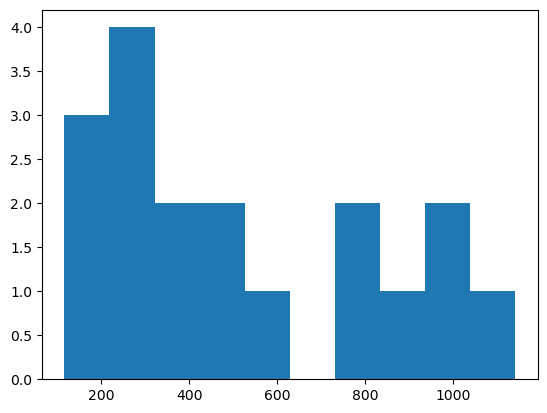

In [3401]:
plt.hist(dfr_curb['perimeter'])